In [2]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

In [20]:
df = pd.read_excel("Case Prediction Data2.xlsx")
df.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
0,204977,Efile Acceptance,2017-01-02 05:39:00,2017-01-03 09:03:00,Web,Medium,Tax Preparation,Efile,Platinum,We transmitted a Michigan return still have not received the acceptance/rejection confirmation.,Compliance,Returns / Reports,NaN,NaN,US.MI,Answer exists KB,041324813494120,How to understand the Transmission Monitor
1,204979,Oregon STAT help: Previous Case 203787 Client needs help after 4pm CST today,2017-01-02 09:03:00,2017-01-04 16:56:00,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client needs help after 4pm CST today,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN
2,204980,Data map incorrectly pulling in values,2017-01-02 11:25:00,2017-01-03 15:48:00,Web,Medium,Tax Preparation,Question / How To,Silver,Corptax Office Import - Credit Account imports are not posting as expected,Office - Excel Add-In,Import / Export,NaN,NaN,US,Answer exists KB,041414821333274,Corptax® Office - How to place an IF formula in the Advanced formula setting of the Data Templat...
3,204981,The New Corptax Connect Website is not properly working,2017-01-02 12:06:00,2017-01-03 09:26:00,Web,High,Tax Preparation,Problem / Error,Silver,Searches can't be performed on the new system. It hasn't functioned properly since the change. ...,Websites,Connections (https://connect.corptax.com),Error Message,NaN,NaN,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wrong while loading this page
4,204986,LD400 is not reflecting a temporary adjustment,2017-01-03 07:17:00,2017-01-05 08:21:00,E-mail,Medium,Tax Preparation,Problem / Error,Platinum,LD400 is not reflecting a temporary adjustment,Compliance,Returns / Reports,NaN,NaN,US,Answer exists KB,041622907012748,Adjustments do not flow to LD400 workpaper and Taxable income per the LD400 does not tie to the ...


In [34]:
df_comp = df[df["Product"] == "Partnership / S Corp / Pass-Through"]
df_comp['Date Created'] = df_comp['Date Created'].dt.date
df_comp['Date Closed'] = df_comp['Date Closed'].dt.date
df_comp['Date'] = pd.to_datetime(df_comp['Date Created'], errors='coerce')
dfc = df_comp

In [35]:
# Adding a new column which will have the number of tickets per day
newdf = dfc[["Date","Case Number"]]
newdf.drop_duplicates(inplace=True)
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = pd.DataFrame(newdf.groupby([newdf["Date"].dt.date]).count()["Case Number"])
newdf = newdf.reset_index()
newdf.index = newdf.Date
newdf['Date'] = pd.to_datetime(newdf['Date'], errors='coerce')
newdf = newdf.asfreq('D')
newdf = newdf.groupby(pd.Grouper(freq="M")).sum()
newdf

,Case Number
Date,
2017-01-31,42.0
2017-02-28,97.0
2017-03-31,161.0
2017-04-30,93.0
2017-05-31,153.0
...,...
2022-04-30,118.0
2022-05-31,162.0
2022-06-30,185.0


In [48]:
pd.set_option('display.max_rows',None)
newdf

,Case Number
Date,
2017-01-31,42.0
2017-02-28,97.0
2017-03-31,161.0
2017-04-30,93.0
2017-05-31,153.0
2017-06-30,179.0
2017-07-31,149.0
2017-08-31,239.0
2017-09-30,222.0


In [36]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2017-01-31 to 2022-08-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  68 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [37]:
f = Forecaster(y=newdf['Case Number'],current_dates=newdf.index)
f.generate_future_dates(12)
f.set_test_length(.2)
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -1.26
the p-value is 0.6494
the series is not stationary
----------------------------------------------------------------------------------------------------


# MLR Forecasting

In [38]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(12) # 2. add regressors (12 lagged terms)
f.add_seasonal_regressors('quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

<AxesSubplot:xlabel='Date', ylabel='Values'>

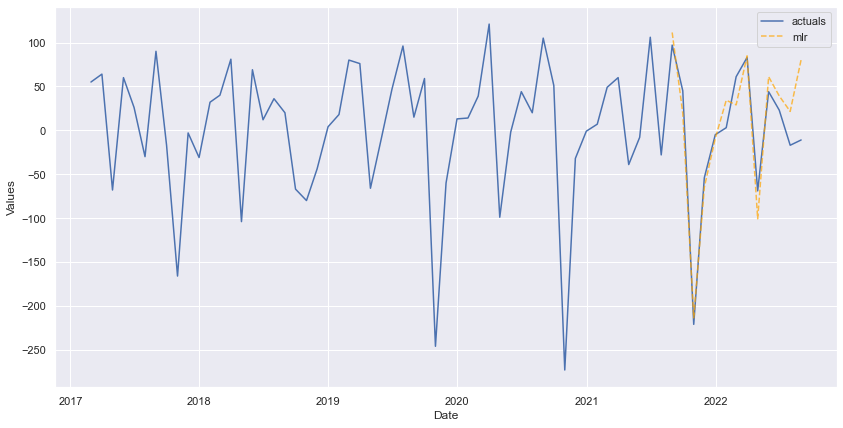

In [39]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

<AxesSubplot:xlabel='Date', ylabel='Values'>

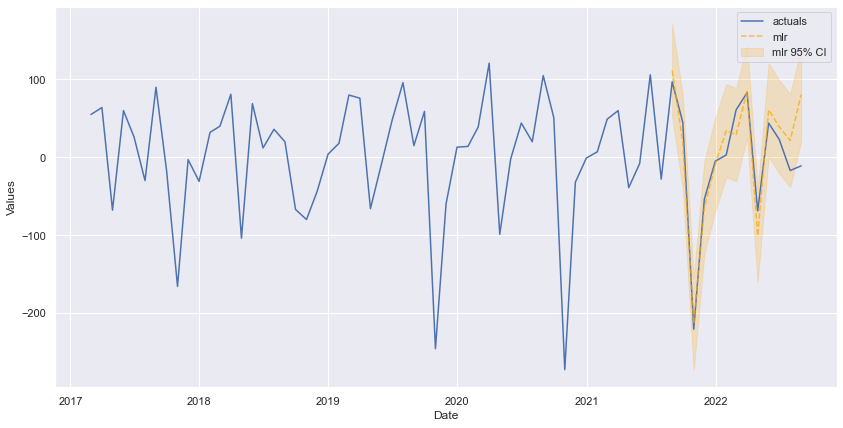

In [40]:
f.plot_test_set(models='mlr',ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

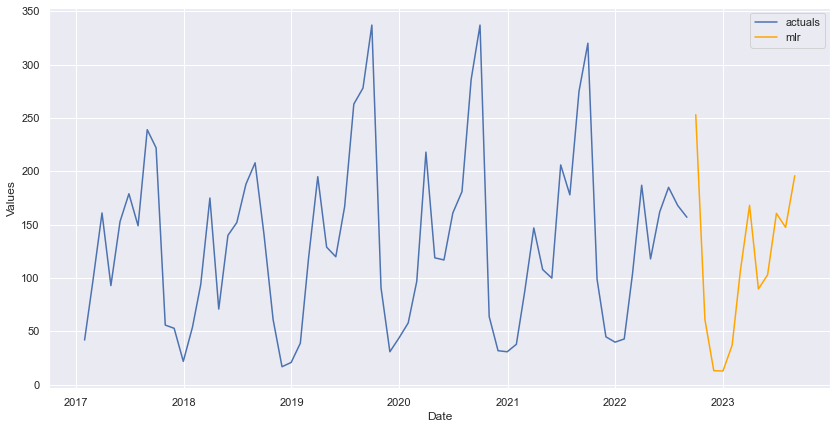

In [41]:
f.plot(models='mlr',
       order_by='LevelTestSetMAPE',
       level=True)

In [42]:
result_train = f.export_fitted_vals(model = "mlr")
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(result_train["Actuals"], result_train["FittedVals"]))
rms

30.637199511155828

In [47]:
result_train

,DATE,Actuals,FittedVals,Residuals
0,2018-02-28,40.0,63.530746,-23.530746
1,2018-03-31,81.0,79.699878,1.300122
2,2018-04-30,-104.0,-79.019146,-24.980854
3,2018-05-31,69.0,54.241898,14.758102
4,2018-06-30,12.0,22.549704,-10.549704
5,2018-07-31,36.0,19.703059,16.296941
6,2018-08-31,20.0,53.221521,-33.221521
7,2018-09-30,-67.0,51.553012,-118.553012
8,2018-10-31,-80.0,-119.882920,39.882920
9,2018-11-30,-44.0,-53.830224,9.830224


In [43]:
pd.options.display.max_colwidth = 100
# results = f.export(to_excel=True,
#                    excel_name='arima_results.xlsx',
#                    determine_best_by='TestSetMAPE')
results = f.export(to_excel=True,
                   excel_name='mlr.xlsx')
pd.set_option('display.max_columns', None)
results["model_summaries"]["TestSetRMSE"]

0    33.383084
Name: TestSetRMSE, dtype: float64

In [44]:
results["model_summaries"]["InSampleRMSE"]

0    30.6372
Name: InSampleRMSE, dtype: float64

In [45]:
results["lvl_fcsts"]

,DATE,mlr
0,2022-09-30,253.057677
1,2022-10-31,61.070830
2,2022-11-30,13.269798
3,2022-12-31,12.987752
4,2023-01-31,37.019296
5,2023-02-28,106.865275
6,2023-03-31,168.196137
7,2023-04-30,89.793529
8,2023-05-31,102.998358
9,2023-06-30,160.625020


In [46]:
results["model_summaries"]["Xvars"][0]

['AR1',
 'AR2',
 'AR3',
 'AR4',
 'AR5',
 'AR6',
 'AR7',
 'AR8',
 'AR9',
 'AR10',
 'AR11',
 'AR12',
 'quarter',
 'quarter_1',
 'quarter_2',
 'quarter_3',
 'quarter_4',
 'year',
 't']

In [61]:
ss = ["val1"]
ss1 = ["val1"]
ss2= ["val1"]
dd = pd.DataFrame([ss,ss1,ss2])
dd[1]=["val2","val4","val4"]
dd[2]=["val4","val4","val4"]
dd

,0,1,2
0,val1,val4,val4
1,val1,val4,val4
2,val1,val4,val4


,0,1,2
0,val1,val4,val4
1,val2,val4,val4
2,val3,val4,val4
